In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
buildloc = r'K:\vanderVoortN\FRC\dev\Fit2DGaussian_fresh\build\Debug'
sys.path.append(buildloc)
import GaussFits
from findPeaksLib import *

In [2]:
from scipy.ndimage import gaussian_filter

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


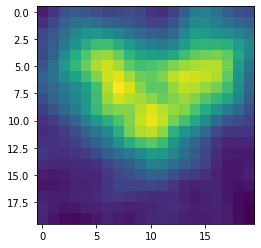

In [7]:
xlen = 20
ylen = 20
model = np.zeros([xlen,ylen])
nruns = 100
twoistar_correctparams0 = np.zeros(nruns)
twoistar_estparams0 = np.zeros(nruns)
for i in range(nruns):
    params0 = np.array([5, #x0
                        5,#y0
                        10, #A0
                        3, #sigma
                        1,#eps
                        1, #bg
                        10, # x1
                        10, #y1
                        10, #A1
                        5, #x2
                        15, #y2
                        10, #A2
                        0, #info
                        0, #wi_nowi
                        0, #fitbg
                        1, #ellipt_circ
                        1, #model
                        0]) # two Istar
    model = GaussFits.modelThree2DGaussian(params0, model)
    noisy = np.random.poisson(model)
    smooth_image = gaussian_filter(noisy.astype(np.double), 1)
    peaks = findPeaks(smooth_image)
    uniquepeaks = findUniquePoints(smooth_image, peaks)
    best_peaks = sortPeaks(uniquepeaks[:,:2], xlen, ylen, mindiff = 2)
    plt.imshow(smooth_image)
    params_est = np.array([best_peaks[0,0], #x0
                        best_peaks[0,1],#y0
                        smooth_image[best_peaks[0,0], best_peaks[0,1]], #A0
                        4, #sigma
                        1,#eps
                        1, #bg
                        best_peaks[1,0], # x1
                        best_peaks[1,1], #y1
                        smooth_image[best_peaks[1,0], best_peaks[1,1]], #A1
                        best_peaks[2,0], #x2
                        best_peaks[2,1], #y2
                        smooth_image[best_peaks[2,0], best_peaks[2,1]], #A2
                        0, #info
                        0, #wi_nowi
                        0, #fitbg
                        1, #ellipt_circ
                        1, #model
                        0]) # two Istar
    params_rand = [20, 20, 10, 5, 1, 2, 20, 20, 10, 20, 20, 10, 0, 0, 0, 0, 0, 0]*np.random.random(18) + \
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
    test0 = GaussFits.Fit2DGauss(params0, noisy)
    test1 = GaussFits.Fit2DGauss(params_est, noisy)
    test_rand = GaussFits.Fit2DGauss(params_rand, noisy)
    twoistar_correctparams0[i] = test0[17]
    twoistar_estparams0[i] = test1[17]
    #print('estimated starting variables: %f \t random starting variables %f' 
    #      %(test0[17] - test1[17], test_rand[17] - test0[17]))
    print(i)

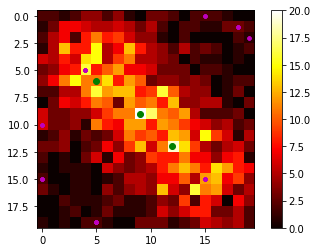

In [4]:
savedir = r'K:\vanderVoortN\reports\BenchmarkingPrecision\20200110MultipleSpotFitting'
plt.imshow(noisy, cmap = 'hot')
plt.plot(peaks[:,1], peaks[:,0], 'm.')
plt.plot(best_peaks[:,1], best_peaks[:,0], 'go')
plt.colorbar()
plt.savefig(os.path.join(savedir,'Linear image (typ).png'), dpi = 300, bbox_inches = 'tight')

In [8]:
#Linear_diff=twoistar_estparams0 - twoistar_correctparams0
#Linear_best = twoistar_correctparams0
Triangle_diff=twoistar_estparams0 - twoistar_correctparams0
Triangle_best = twoistar_correctparams0

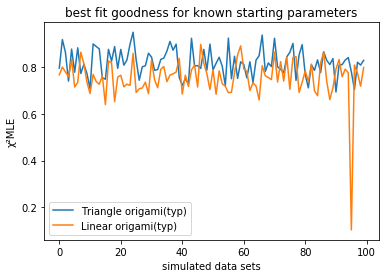

In [9]:
plt.plot(Triangle_best, label = 'Triangle origami(typ)')
plt.plot(Linear_best, label = 'Linear origami(typ)')
plt.ylabel('\u03C7\u00B2MLE')
plt.xlabel('simulated data sets')
plt.title('best fit goodness for known starting parameters')
plt.legend()
plt.savefig(os.path.join(savedir,'best fit goodness.png'), dpi = 300, bbox_inches = 'tight')

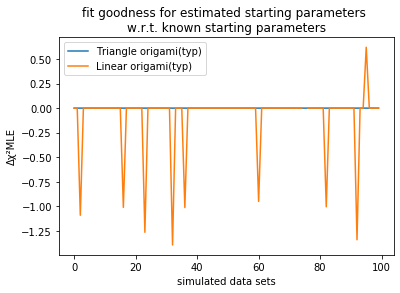

In [10]:
plt.plot(Triangle_diff, label = 'Triangle origami(typ)')
plt.plot(Linear_diff, label = 'Linear origami(typ)')
plt.ylabel('\u0394\u03C7\u00B2MLE')
plt.xlabel('simulated data sets')
plt.title('fit goodness for estimated starting parameters \nw.r.t. known starting parameters')
plt.legend()
plt.savefig(os.path.join(savedir,'relative fit goodness.png'), dpi = 300, bbox_inches = 'tight')